In [32]:
from SmartBeta import SmartBeta as SB
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from scipy.stats import norm

In [33]:
# Load the Excel file
file_path = "data/case_study_data.xlsx"

# Get all sheet names
xls = pd.ExcelFile(file_path)
sheets = xls.sheet_names

# Exclude sheets containing "zc rates" (case insensitive)
filtered_sheets = [sheet for sheet in sheets if sheet != 'ZC yields']

# Dictionary to store data from each sheet
dataframes = []

# Loop through each relevant sheet and read data
for sheet in filtered_sheets:
    if sheet ==filtered_sheets[0]:
        df = pd.read_excel(file_path, sheet_name=sheet,header = 1)
        df.index = pd.to_datetime(df.date)
        df = df.drop(columns = ['date'])
    else:
        df_columns = pd.read_excel(file_path, sheet_name=sheet,header = 3).columns[0].split(',')
        df_columns = ['date'] + [i+f"_{sheet}" for i in df_columns if i != 'date']
        df_initial = pd.read_excel(file_path, sheet_name=sheet,header = 3).iloc[:,0].str.split(',', expand=True)
        df = pd.DataFrame(df_initial)
        df.columns = df_columns
        df.index = pd.to_datetime(df.date)
        df = df.drop(columns = ['date', f'NR(USD)_{sheet}',f'RI(USD)_{sheet}'])
        df.columns = [sheet]
        
    dataframes.append(df)

# Combine all data into a single DataFrame
#merged_df = dataframes[0]
#for df in dataframes[1:]:
#    merged_df = pd.merge(merged_df, df, on="date", how="outer")  # Outer join to include all dates
merged_df = pd.concat(dataframes, axis=1).astype(np.float32)

In [34]:
import yfinance as yf
# Define the ticker and date range
ticker = "^GSPC"  # S&P 500 index symbol
start_date = "2002-06-21"
end_date = "2024-10-31"

# Download the data from Yahoo Finance
sp500_data = yf.download(ticker, start=start_date, end=end_date, progress=False)

# Keep only the adjusted close prices
sp500_adj_close = sp500_data['Adj Close']
sp500_adj_close.index = sp500_adj_close.index.tz_localize(None)
sp500_adj_close.index = pd.to_datetime(sp500_adj_close.index)

merged_df['S&P500'] = sp500_adj_close

In [35]:
merged_df

,S&P500,Value,Mid Cap,Momentum,Low Volatility,Low Investment,High Profitability
date,,,,,,,
2002-06-21,989.140015,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2002-06-24,992.719971,99.412865,99.272835,99.543686,99.456085,99.369980,99.588921
2002-06-25,976.140015,97.991348,98.011650,97.988693,98.110001,97.918114,97.935478
2002-06-26,973.530029,97.107742,97.209297,97.670837,97.978973,97.512131,97.684639
2002-06-27,990.640015,98.566162,98.497551,99.076393,99.430801,98.910538,99.197662
...,...,...,...,...,...,...,...
2025-01-09,NaN,715.295898,748.991638,617.836060,627.133911,648.058838,808.781189
2025-01-10,NaN,705.297913,737.555054,607.982117,616.704651,637.991882,798.426575
2025-01-13,NaN,710.003784,743.087036,610.947449,620.224243,643.919495,803.485535


In [44]:
factor_returns = merged_df.pct_change().loc[:"31-10-2024",:]
factor_returns = factor_returns.dropna()
factor_returns

/Users/jamielam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6393: UserWarning: Parsing '31-10-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


,S&P500,Value,Mid Cap,Momentum,Low Volatility,Low Investment,High Profitability
date,,,,,,,
2002-06-24,0.003619,-0.005871,-0.007272,-0.004563,-0.005439,-0.006300,-0.004111
2002-06-25,-0.016702,-0.014299,-0.012704,-0.015621,-0.013534,-0.014611,-0.016603
2002-06-26,-0.002674,-0.009017,-0.008186,-0.003244,-0.001336,-0.004146,-0.002561
2002-06-27,0.017575,0.015019,0.013252,0.014391,0.014818,0.014341,0.015489
2002-06-28,-0.000828,0.009259,0.008427,0.004909,0.004169,0.005646,0.002886
...,...,...,...,...,...,...,...
2024-10-25,-0.000299,-0.007194,-0.007614,-0.004394,-0.008165,-0.009194,-0.004184
2024-10-28,0.002651,0.005581,0.005859,0.004126,0.004564,0.005924,0.002756
2024-10-29,0.001614,-0.005922,-0.004116,-0.002218,-0.004573,-0.004336,-0.002383


In [ ]:
factor_returns

,S&P500,Value,Mid Cap,Momentum,Low Volatility,Low Investment,High Profitability
date,,,,,,,
2002-06-24,0.003619,-0.005871,-0.007272,-0.004563,-0.005439,-0.006300,-0.004111
2002-06-25,-0.016702,-0.014299,-0.012704,-0.015621,-0.013534,-0.014611,-0.016603
2002-06-26,-0.002674,-0.009017,-0.008186,-0.003244,-0.001336,-0.004146,-0.002561
2002-06-27,0.017575,0.015019,0.013252,0.014391,0.014818,0.014341,0.015489
2002-06-28,-0.000828,0.009259,0.008427,0.004909,0.004169,0.005646,0.002886


In [38]:

# Convert factor returns to price series
prices = (1 + factor_returns).cumprod() * 100  # Starting at 100

In [39]:
prices

,S&P500,Value,Mid Cap,Momentum,Low Volatility,Low Investment,High Profitability
date,,,,,,,
2002-06-24,100.361926,99.412865,99.272835,99.543686,99.456085,99.369980,99.588921
2002-06-25,98.685727,97.991356,98.011650,97.988693,98.109993,97.918114,97.935471
2002-06-26,98.421863,97.107750,97.209297,97.670837,97.978966,97.512123,97.684631
2002-06-27,100.151647,98.566170,98.497551,99.076393,99.430794,98.910538,99.197655
2002-06-28,100.068746,99.478844,99.327560,99.562790,99.845322,99.468971,99.483910
...,...,...,...,...,...,...,...
2024-10-25,587.188874,718.126038,742.492981,612.877197,639.318726,658.615234,807.877625
2024-10-28,588.745772,722.133545,746.843628,615.405823,642.236694,662.517090,810.104187
2024-10-29,589.696083,717.857422,743.769531,614.040833,639.299988,659.644287,808.173950


In [40]:
prices_exsnp =  prices.drop(columns=["S&P500"])


In [41]:
prices_exsnp

,Value,Mid Cap,Momentum,Low Volatility,Low Investment,High Profitability
date,,,,,,
2002-06-24,99.412865,99.272835,99.543686,99.456085,99.369980,99.588921
2002-06-25,97.991356,98.011650,97.988693,98.109993,97.918114,97.935471
2002-06-26,97.107750,97.209297,97.670837,97.978966,97.512123,97.684631
2002-06-27,98.566170,98.497551,99.076393,99.430794,98.910538,99.197655
2002-06-28,99.478844,99.327560,99.562790,99.845322,99.468971,99.483910
...,...,...,...,...,...,...
2024-10-25,718.126038,742.492981,612.877197,639.318726,658.615234,807.877625
2024-10-28,722.133545,746.843628,615.405823,642.236694,662.517090,810.104187
2024-10-29,717.857422,743.769531,614.040833,639.299988,659.644287,808.173950


In [47]:
# Convert factor returns to price series
prices = (1 + factor_returns).cumprod() * 100  # Starting at 100

n = len(prices)
rebalance_indices = []
current = 89  # First rebalance after 90 days (index 89)
while current < n:
    rebalance_indices.append(current)
    current += 90

portfolio_returns = pd.Series(index=factor_returns.index, dtype=float)
weights_history = {}

for i in rebalance_indices:
    # Get estimation window (past 90 days)
    est_start = i - 89
    est_end = i
    est_prices = prices.iloc[est_start:est_end + 1]
    
    # Compute optimal weights using SmartBeta (Example: Global Minimum Variance)
    scheme = 'GMV'
    try:
        smart_beta = SB(est_prices, scheme=scheme, bounds=(0, 1))
        weights = smart_beta.Function_SmartBeta()
        weights = np.round(weights, 4)  # Round for readability
    except Exception as e:
        print(f"Optimization failed at {prices.index[i]}: {e}")
        weights = np.zeros(len(est_prices.columns))  # Fallback to zero weights
    
    # Store weights with rebalance date
    weights_history[prices.index[i]] = weights
    
    # Determine holding period
    holding_start = i + 1
    holding_end = min(i + 90, n - 1)
    if holding_start >= n:
        break
    
    # Extract holding period returns
    holding_returns = factor_returns.iloc[holding_start:holding_end + 1]
    
    # Compute portfolio returns
    port_rets = holding_returns.dot(weights)
    portfolio_returns.loc[port_rets.index] = port_rets

# Fill non-held periods with 0 returns
portfolio_returns.fillna(0, inplace=True)

# Calculate cumulative return
cumulative_return = (1 + portfolio_returns).cumprod() - 1
final_cumulative = cumulative_return.iloc[-1]

# Display results
print("Optimal Weights at Each Rebalance:")
for date, weights in weights_history.items():
    print(f"Date: {date.strftime('%Y-%m-%d')}, Weights: {dict(zip(prices.columns, weights))}")

print(f"\nCumulative Return: {final_cumulative:.2%}")

Optimal Weights at Each Rebalance:
Date: 2002-10-25, Weights: {'S&P500': 0.1429, 'Value': 0.1429, 'Mid Cap': 0.1429, 'Momentum': 0.1429, 'Low Volatility ': 0.1429, 'Low Investment': 0.1429, 'High Profitability': 0.1429}
Date: 2003-02-28, Weights: {'S&P500': 0.1429, 'Value': 0.1429, 'Mid Cap': 0.1429, 'Momentum': 0.1429, 'Low Volatility ': 0.1429, 'Low Investment': 0.1429, 'High Profitability': 0.1429}
Date: 2003-07-04, Weights: {'S&P500': 0.1429, 'Value': 0.1429, 'Mid Cap': 0.1429, 'Momentum': 0.1429, 'Low Volatility ': 0.1429, 'Low Investment': 0.1429, 'High Profitability': 0.1429}
Date: 2003-11-07, Weights: {'S&P500': 0.1429, 'Value': 0.1429, 'Mid Cap': 0.1429, 'Momentum': 0.1429, 'Low Volatility ': 0.1429, 'Low Investment': 0.1429, 'High Profitability': 0.1429}
Date: 2004-03-12, Weights: {'S&P500': 0.1429, 'Value': 0.1429, 'Mid Cap': 0.1429, 'Momentum': 0.1429, 'Low Volatility ': 0.1429, 'Low Investment': 0.1429, 'High Profitability': 0.1429}
Date: 2004-07-16, Weights: {'S&P500': 0.

In [49]:
import pandas as pd
import numpy as np

# Assuming factor_returns is a DataFrame with columns: 
# ['S&P500', 'Value', 'Mid Cap', 'Momentum', 'Low Volatility', 'Low Investment', 'High Profitability']

# Convert factor returns to price series
prices = (1 + factor_returns).cumprod() * 100  # Starting at 100

n = len(prices)
rebalance_indices = []
current = 89  # First rebalance after 90 days (index 89)
while current < n:
    rebalance_indices.append(current)
    current += 90

# Initialize dictionaries to store results for all schemes except "MV"
schemes = ['EW', 'MSR', 'GMV', 'DR', 'RP']  # Exclude "MV"
portfolio_returns = {scheme: pd.Series(index=factor_returns.index, dtype=float) for scheme in schemes}
weights_history = {scheme: {} for scheme in schemes}

for i in rebalance_indices:
    # Get estimation window (past 90 days)
    est_start = i - 89
    est_end = i
    est_prices = prices.iloc[est_start:est_end + 1]
    
    # Determine holding period
    holding_start = i + 1
    holding_end = min(i + 90, n - 1)
    if holding_start >= n:
        break
    
    # Extract holding period returns
    holding_returns = factor_returns.iloc[holding_start:holding_end + 1]
    
    # Compute weights and returns for each scheme
    for scheme in schemes:
        try:
            if scheme == 'EW':
                # Equal Weight (no optimization)
                weights = np.ones(len(est_prices.columns)) / len(est_prices.columns)
            else:
                # Optimize for other schemes
                smart_beta = SB(est_prices, scheme=scheme, bounds=(0, 1))
                weights = smart_beta.Function_SmartBeta()
                weights = np.round(weights, 4)  # Round for readability
            
            # Store weights with rebalance date
            weights_history[scheme][prices.index[i]] = weights
            
            # Compute portfolio returns for the holding period
            port_rets = holding_returns.dot(weights)
            portfolio_returns[scheme].loc[port_rets.index] = port_rets
        except Exception as e:
            print(f"Failed for {scheme} at {prices.index[i]}: {e}")
            # Fallback to zero returns if optimization fails
            portfolio_returns[scheme].loc[holding_returns.index] = 0

# Calculate cumulative returns for each scheme
cumulative_returns = {}
for scheme in schemes:
    portfolio_returns[scheme].fillna(0, inplace=True)
    cumulative_returns[scheme] = (1 + portfolio_returns[scheme]).cumprod() - 1

# Display results
print("Optimal Weights at Each Rebalance:")
for scheme in schemes:
    print(f"\nScheme: {scheme}")
    for date, weights in weights_history[scheme].items():
        print(f"Date: {date.strftime('%Y-%m-%d')}, Weights: {dict(zip(prices.columns, weights))}")

print("\nFinal Cumulative Returns:")
for scheme, cr in cumulative_returns.items():
    print(f"{scheme}: {cr.iloc[-1]:.2%}")

Optimal Weights at Each Rebalance:

Scheme: EW
Date: 2002-10-25, Weights: {'S&P500': 0.14285714285714285, 'Value': 0.14285714285714285, 'Mid Cap': 0.14285714285714285, 'Momentum': 0.14285714285714285, 'Low Volatility ': 0.14285714285714285, 'Low Investment': 0.14285714285714285, 'High Profitability': 0.14285714285714285}
Date: 2003-02-28, Weights: {'S&P500': 0.14285714285714285, 'Value': 0.14285714285714285, 'Mid Cap': 0.14285714285714285, 'Momentum': 0.14285714285714285, 'Low Volatility ': 0.14285714285714285, 'Low Investment': 0.14285714285714285, 'High Profitability': 0.14285714285714285}
Date: 2003-07-04, Weights: {'S&P500': 0.14285714285714285, 'Value': 0.14285714285714285, 'Mid Cap': 0.14285714285714285, 'Momentum': 0.14285714285714285, 'Low Volatility ': 0.14285714285714285, 'Low Investment': 0.14285714285714285, 'High Profitability': 0.14285714285714285}
Date: 2003-11-07, Weights: {'S&P500': 0.14285714285714285, 'Value': 0.14285714285714285, 'Mid Cap': 0.14285714285714285, 'Mom

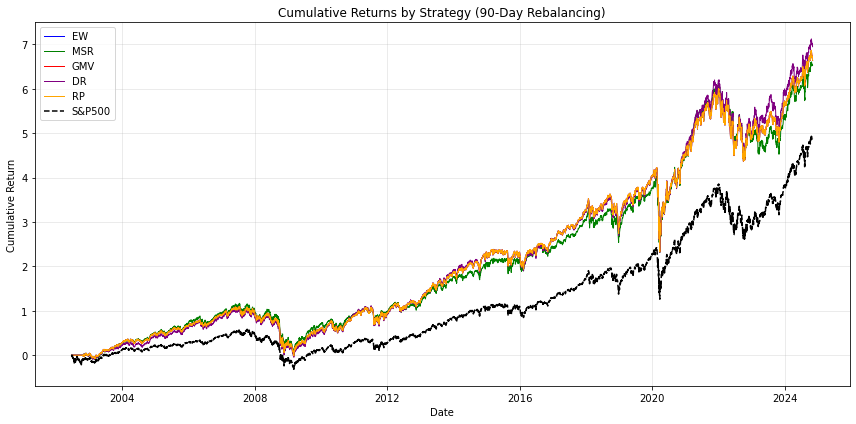

In [50]:
import matplotlib.pyplot as plt

# Calculate S&P500 cumulative returns (benchmark)
snp_returns = factor_returns['S&P500'].copy()
snp_cumulative = (1 + snp_returns).cumprod() - 1

# Add S&P500 to results for plotting
cumulative_returns['S&P500'] = snp_cumulative

# Plot settings
plt.figure(figsize=(12, 6))
colors = {'EW': 'blue', 'MSR': 'green', 'GMV': 'red', 'DR': 'purple', 'RP': 'orange', 'S&P500': 'black'}
linestyles = {'S&P500': '--'}

for scheme in list(cumulative_returns.keys()):
    plt.plot(
        cumulative_returns[scheme].index,
        cumulative_returns[scheme],
        label=scheme,
        color=colors.get(scheme, 'gray'),
        linestyle=linestyles.get(scheme, '-'),
        linewidth=1.5 if scheme == 'S&P500' else 1
    )

plt.title('Cumulative Returns by Strategy (90-Day Rebalancing)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left', frameon=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()